In [59]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [ ]:
musk =pd.read_csv('/content/Elon_musk (2).csv',
                  encoding='latin')
musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
musk=musk['Text']

In [ ]:
musk=[y.strip() for y in musk if y]

In [ ]:
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
text=' '.join(musk)

In [ ]:
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

text_tokens=word_tokenize(no_punc_text)

In [ ]:
len(text_tokens)

21078

In [ ]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [ ]:
#Noramalize the data
lower_words = [y.lower() for y in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2702,231,2439,3621,4498,962,1676,3157,1670,4532,...,1079,3510,4253,3546,4036,2331,774,3821,1530,247


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2702
alien,231
idaacarmack,2439
ray,3621
trace,4498
...,...
httpstcowjrzibkh1h,2331
click,774
samwise,3821
gamgee,1530


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [ ]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2439, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1676, 'nextlevel': 3157, 'have': 1670, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1608, 'interview': 2550, 'gtera27': 1627, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1657, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1722, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1642, 'thanks': 4381, 'indeed': 2488, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(15795, 4971)


In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.vocabulary_)


{'an': 6, 'id_aa_carmack': 33, 'on': 57, 'with': 94, 'is': 37, 'have': 28, 'you': 99, 'it': 38, 'great': 25, 'tesla': 75, 'for': 22, 'year': 97, 'to': 85, 'the': 80, 'more': 45, 'new': 52, 'of': 55, 'https': 31, 'co': 16, 'of the': 56, 'https co': 32, 'was': 88, 'all': 3, 'he': 29, 'would': 95, 'most': 46, 'flcnhvy': 21, 'haha': 26, 'do': 17, 'not': 54, 'just': 39, 'some': 71, 'so': 70, 'can': 14, 'be': 11, 'has': 27, 'but': 12, 'high': 30, 'my': 48, '0001f923': 0, '0001f923 0001f923': 1, 'this': 83, 'true': 87, 'this is': 84, 'that': 79, 'should': 69, 'at': 10, 'rt': 67, 'spacex': 72, 'nasa': 49, 'launch': 41, 'first': 20, 'one': 58, 'rt spacex': 68, 'yes': 98, 'rationaletienne': 65, 'we': 89, 'will': 92, 'amp': 5, 'if': 34, 'or': 59, 'in': 35, 'there': 81, 'too': 86, 'what': 90, 're': 66, 'erdayastronaut': 19, 'people': 62, 'as': 9, 'out': 61, 'and': 7, 'kristennetten': 40, 'yeah': 96, 'sure': 74, 'about': 2, 'much': 47, 'teslarati': 77, 'nasaspaceflight': 50, 'than': 78, 'from': 23,

In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TFidf vectorizer:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm=None,
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [ ]:
print(vectorizer_n_gram_max_features.vocabulary_)

{'an': 6, 'id_aa_carmack': 33, 'on': 57, 'with': 94, 'is': 37, 'have': 28, 'you': 99, 'it': 38, 'great': 25, 'tesla': 75, 'for': 22, 'year': 97, 'to': 85, 'the': 80, 'more': 45, 'new': 52, 'of': 55, 'https': 31, 'co': 16, 'of the': 56, 'https co': 32, 'was': 88, 'all': 3, 'he': 29, 'would': 95, 'most': 46, 'flcnhvy': 21, 'haha': 26, 'do': 17, 'not': 54, 'just': 39, 'some': 71, 'so': 70, 'can': 14, 'be': 11, 'has': 27, 'but': 12, 'high': 30, 'my': 48, '0001f923': 0, '0001f923 0001f923': 1, 'this': 83, 'true': 87, 'this is': 84, 'that': 79, 'should': 69, 'at': 10, 'rt': 67, 'spacex': 72, 'nasa': 49, 'launch': 41, 'first': 20, 'one': 58, 'rt spacex': 68, 'yes': 98, 'rationaletienne': 65, 'we': 89, 'will': 92, 'amp': 5, 'if': 34, 'or': 59, 'in': 35, 'there': 81, 'too': 86, 'what': 90, 're': 66, 'erdayastronaut': 19, 'people': 62, 'as': 9, 'out': 61, 'and': 7, 'kristennetten': 40, 'yeah': 96, 'sure': 74, 'about': 2, 'much': 47, 'teslarati': 77, 'nasaspaceflight': 50, 'than': 78, 'from': 23,

In [ ]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         4.07911388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Generate Wordcloud:

In [ ]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):


    plt.figure(figsize=(60, 40))    # Set figure size


    plt.imshow(wordcloud)           # Display image


    plt.axis("off")

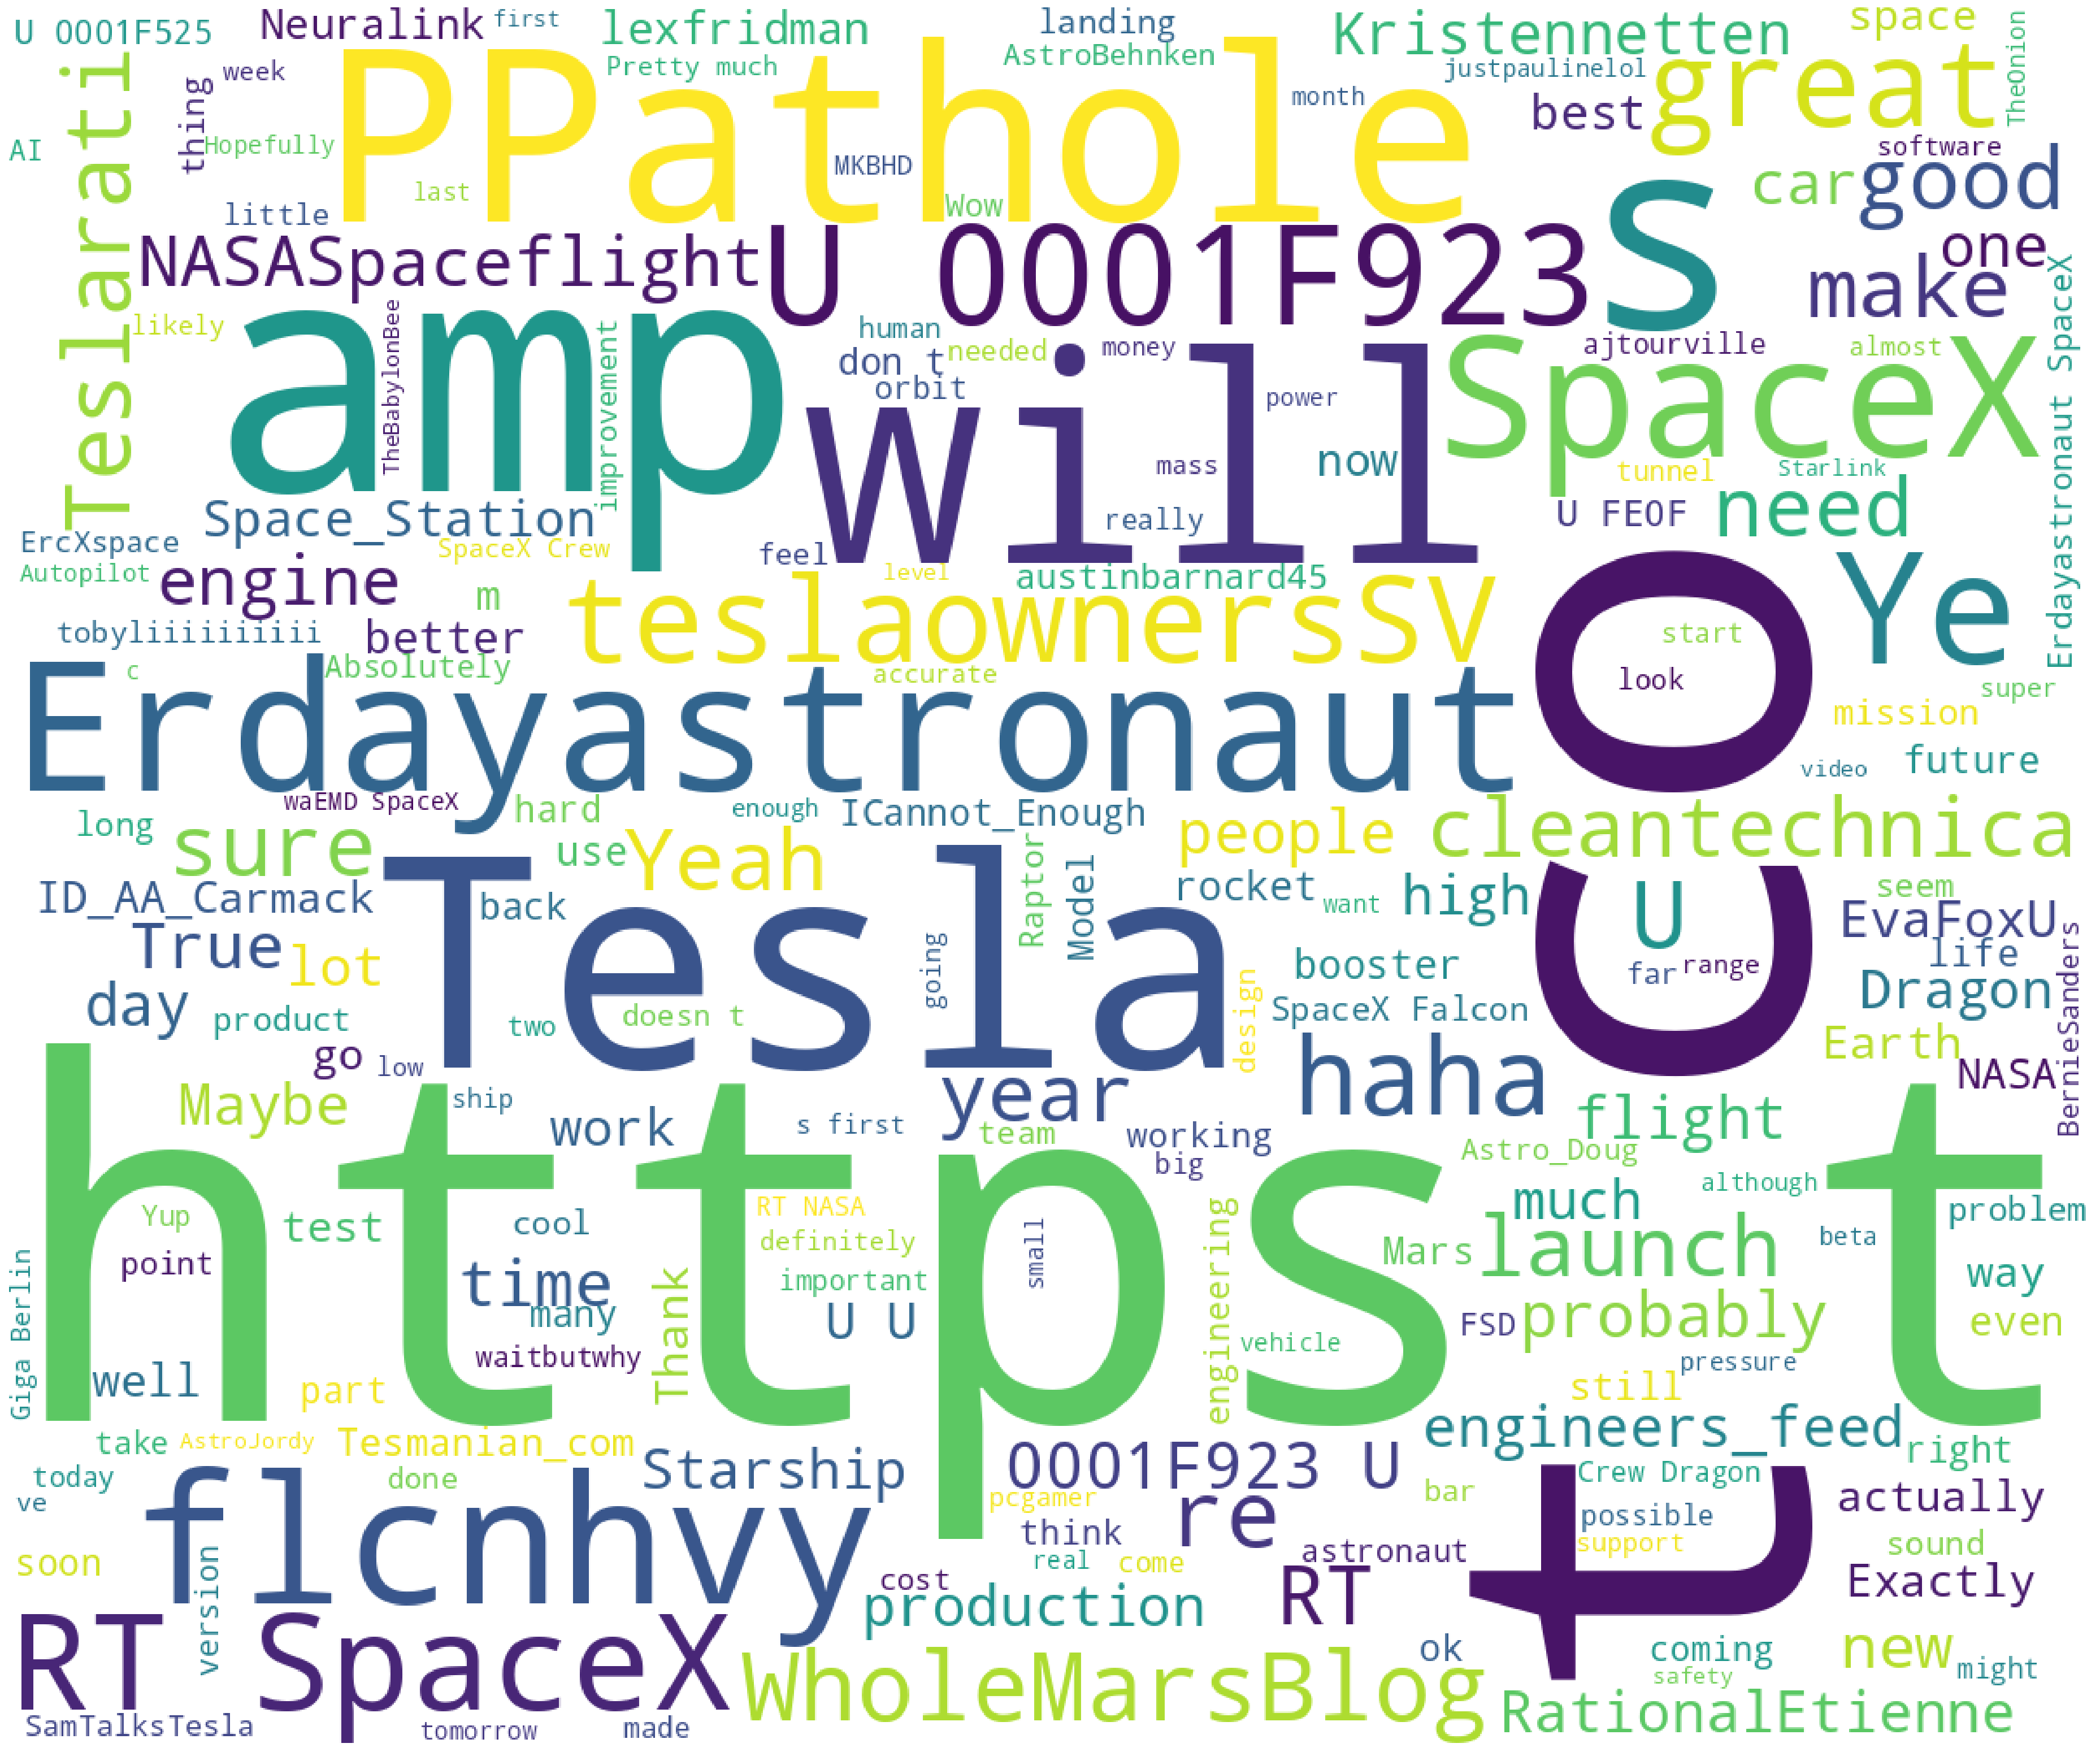

In [ ]:
wordcloud=WordCloud(background_color='white',width=1200,height=1000).generate(text)
plot_cloud(wordcloud)

In [ ]:
musk2=pd.read_csv('/content/Elon_musk (2).csv',encoding='latin')
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk2=musk2['Text']
musk2

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [ ]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [ ]:
len(nouns_verbs)

3

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(3, 3)

In [ ]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [ ]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.vocabulary_)
temp_df

,tracing,level,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [ ]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]])

In [ ]:
type(sum_words)

numpy.matrix

In [ ]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [ ]:
vocab_list=list(cv.vocabulary_.keys())
vocab_list

['tracing', 'level', 'tried']

In [ ]:
import numpy as np
import pandas as pd
wf_df = pd.DataFrame({'word' :  vocab_list,
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,tracing,1
1,level,1
2,tried,1


Visualizing results:

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

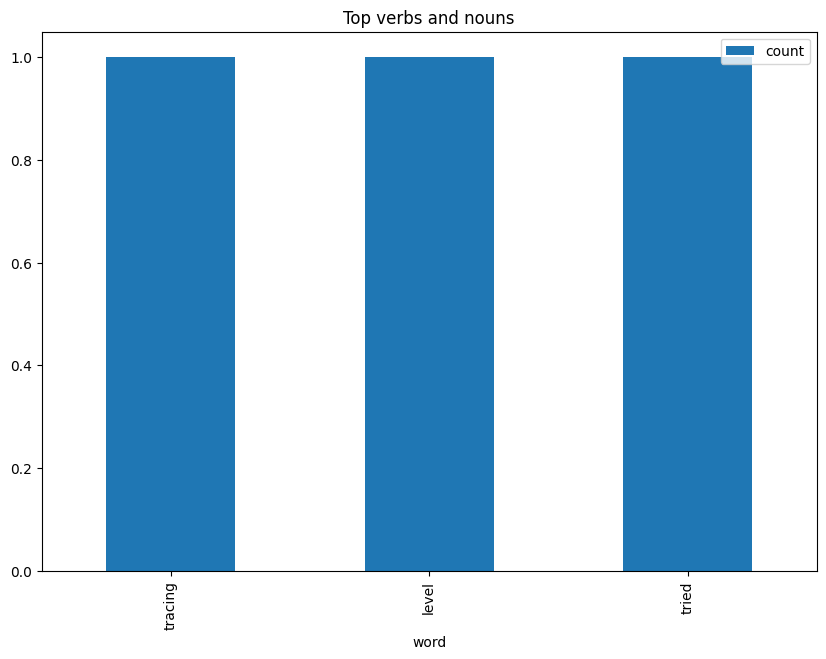

In [ ]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

In [ ]:
import os

In [60]:
#Sentiment analysis
# Get the absolute path to the current script's directory
current_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(current_dir, 'Afinn.csv')

# Now use the full path when reading the CSV file
Elon = pd.read_csv('/content/Afinn (1).csv', sep=",", encoding='latin-1')
Elon

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [62]:
Elon[1200:]

,word,value
1200,hooliganism,-2
1201,hooligans,-2
1202,hope,2
1203,hopeful,2
1204,hopefully,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [63]:
from nltk import tokenize
sentances=tokenize.sent_tokenize(" ".join(musk2))
sentances[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [64]:
sent_df=pd.DataFrame(sentances,columns=['sentances'])
sent_df

,sentances
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [65]:
affinity_scores=Elon.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [66]:
nlp=spacy.load('en_core_web_sm')

In [67]:
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        doc=nlp(text)
        for word in doc:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [68]:
calculate_sentiment(text="hi")

0

In [69]:
calculate_sentiment(text='good')

3

In [70]:
calculate_sentiment(text='bad')

-3

In [71]:
calculate_sentiment(text='awesome')

4

In [72]:
calculate_sentiment(text='worst')

-3

In [73]:
calculate_sentiment(text='Amazing,wonderful session')

4

In [74]:
sent_df['sentiment_value']=sent_df['sentances'].apply(calculate_sentiment)

In [75]:
sent_df

,sentances,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",0
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0


In [76]:
sent_df['sentiment_value'].describe()

,sentiment_value
count,927.000000
mean,0.070119
std,0.453499
min,-2.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [77]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentances,sentiment_value
804,Best boss battle song ever.,3
148,Great game.,3
733,Great mission patch design!,3
858,Impressive Tianwen-1 Mars rover mission launch...,3
74,Excited about offering low-cost access to o h...,3
687,Grateful for my @Tesla #Powerwall and 162 hour...,3
829,Haha @cleantechnica This has a lot of potential.,3
619,Good insight.,3
89,Good progress towards our Hop in &amp; go to ...,3
253,"Wow, roc https://t.co/0SRlFg03Fg @TashaARK To...",4


In [78]:
sent_df[sent_df['sentiment_value']<=0].head(10)

,sentances,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,0
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,0
8,Tweets definitely do not represent real-world ...,0
9,The most entertaining outcome is the most like...,0


In [84]:
sent_df[sent_df['sentiment_value']<-3].head(5)

,sentances,sentiment_value


In [85]:
sent_df[sent_df['sentiment_value']>3].head(5)

,sentances,sentiment_value
253,"Wow, roc https://t.co/0SRlFg03Fg @TashaARK To...",4


In [86]:
sent_df['sentiment_category']=sent_df['sentiment_value'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))

In [87]:
sent_df['sentiment_category'].value_counts()

,count
sentiment_category,
neutral,879
positive,37
negative,11


In [88]:
sent_df['index']=range(0,len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

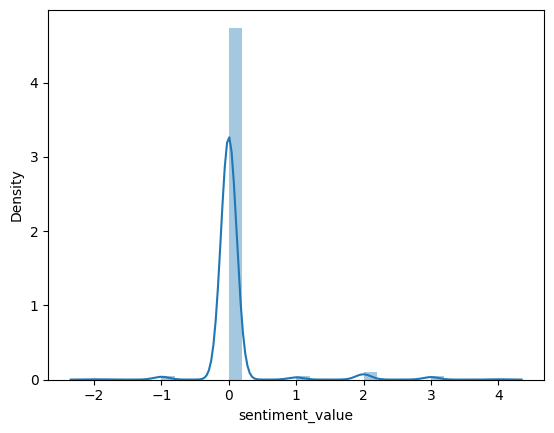

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt,
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

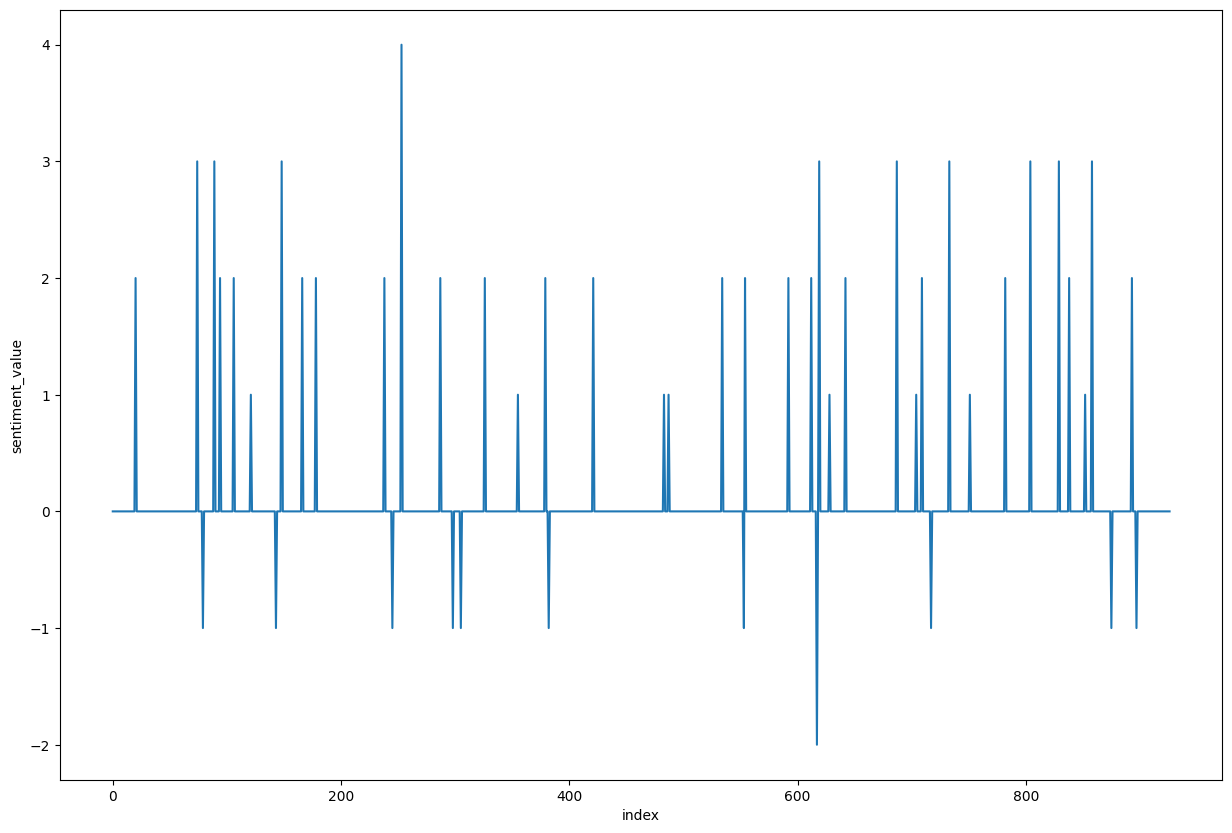

In [90]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [92]:
#Pw for positive words
#Nw for Negative words
PW=sent_df[sent_df['sentiment_category']=='positive']['sentances'].tolist()
Nw=sent_df[sent_df['sentiment_category']=='negative']['sentances'].tolist()

In [94]:
PW

['Improve ship &amp; booster mass @michaelhodapp_ Back to work tonight!',
 'Excited about offering low-cost access to o\x85 https://t.co/w66u5qdUh9 @GerberKawasaki They are part of the solution, but require lots of fresh water &amp; land.',
 'Good progress towards our \x93Hop in &amp; go to Mars!\x94 goal.',
 'Help would be appreciated.',
 'Hopefully.',
 'Huge thanks to all those who made this possible.',
 'Great game.',
 'Thanks to everyone who worked so hard to make Tesla successful.',
 'Hopefully launching tomorrow.',
 'Improvement should be significant.',
 'Wow, roc\x85 https://t.co/0SRlFg03Fg @TashaARK To be clear, this was just an XPeng problem.',
 'Hopefully, more Teslaquila next month.',
 'Worth a read.',
 'Want to find out?',
 'Hopefully, around middle of next year.',
 'Thanks all beta testers!',
 'Pretty odd\x85 https://t.co/PPSorKWdI8 @enn_nafnlaus When Eberhard was fired from the Tesla CEO role in mid 2007 for providing false information to me &amp; t\x85 https://t.co/8hJ3V

In [96]:
Nw

['No question that FSD should be viewed as reasonably valuable when doing a trade-in.',
 'Stop the sneaky moves, Charlie Ergen!',
 'No heat shielding needed.',
 'No symptoms for past few days, apart from fatigue.',
 'No symptoms right now.',
 'No problem if there\x92s a way get current design Cybertruck approved in Europe!',
 'No more hydraulics.',
 'Problems like that have been addressed.',
 'Hard to see with naked eye.',
 'Left by myself when I was 17.',
 'No expert installer required.']